### Importing Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels as smd
from datascience import *

%matplotlib inline

In [2]:
train_df = pd.read_csv("nba_box_score.csv")

print("Number of samples are :", train_df.shape[0],"and number of features are :", train_df.shape[1])

train_df

Number of samples are : 1548 and number of features are : 22


,TEAM,PLAYER,MIN,FGM,FGA,FG%,3PM,3PA,3P%,FTM,...,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,+/-
0,Dallas Mavericks,\nReggie Bullock\n,29:53,3,6,50.0,3,5,60.0,1,...,0,2,2,1,0,0,2,3,10,-11
1,Dallas Mavericks,\nDorian Finney-Smith\n,38:12,2,4,50.0,1,2,50.0,0,...,0,3,3,0,2,0,0,4,5,-10
2,Dallas Mavericks,\nJaVale McGee\n,14:08,1,3,33.3,0,0,0.0,1,...,1,3,4,1,1,1,2,1,3,-5
3,Dallas Mavericks,\nSpencer Dinwiddie\n,27:31,6,11,54.5,3,5,60.0,0,...,0,3,3,3,0,0,0,4,15,2
4,Dallas Mavericks,\nLuka Doncic\n,36:40,10,23,43.5,2,10,20.0,13,...,0,9,9,6,1,0,4,3,35,-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,Orlando Magic,\nTerrence Ross,26:37,1,4,25.0,1,2,50.0,3,...,0,2,2,2,0,0,3,3,6,-2
1544,Orlando Magic,\nAdmiral Schofield,11:30,3,4,75.0,0,1,0.0,0,...,1,0,1,3,1,0,1,5,6,-9
1545,Orlando Magic,\nCaleb Houstan,22:19,1,3,33.3,1,3,33.3,0,...,0,4,4,0,0,0,0,0,3,3
1546,Orlando Magic,\nR.J. Hampton,10:15,2,6,33.3,0,2,0.0,0,...,0,0,0,1,0,0,1,1,4,-12


In [3]:
train_df["PLAYER"] = train_df["PLAYER"].map(lambda x: x.lstrip('\n').rstrip('\n'))
train_df

,TEAM,PLAYER,MIN,FGM,FGA,FG%,3PM,3PA,3P%,FTM,...,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,+/-
0,Dallas Mavericks,Reggie Bullock,29:53,3,6,50.0,3,5,60.0,1,...,0,2,2,1,0,0,2,3,10,-11
1,Dallas Mavericks,Dorian Finney-Smith,38:12,2,4,50.0,1,2,50.0,0,...,0,3,3,0,2,0,0,4,5,-10
2,Dallas Mavericks,JaVale McGee,14:08,1,3,33.3,0,0,0.0,1,...,1,3,4,1,1,1,2,1,3,-5
3,Dallas Mavericks,Spencer Dinwiddie,27:31,6,11,54.5,3,5,60.0,0,...,0,3,3,3,0,0,0,4,15,2
4,Dallas Mavericks,Luka Doncic,36:40,10,23,43.5,2,10,20.0,13,...,0,9,9,6,1,0,4,3,35,-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,Orlando Magic,Terrence Ross,26:37,1,4,25.0,1,2,50.0,3,...,0,2,2,2,0,0,3,3,6,-2
1544,Orlando Magic,Admiral Schofield,11:30,3,4,75.0,0,1,0.0,0,...,1,0,1,3,1,0,1,5,6,-9
1545,Orlando Magic,Caleb Houstan,22:19,1,3,33.3,1,3,33.3,0,...,0,4,4,0,0,0,0,0,3,3
1546,Orlando Magic,R.J. Hampton,10:15,2,6,33.3,0,2,0.0,0,...,0,0,0,1,0,0,1,1,4,-12


In [4]:
train_df.isnull().sum()

TEAM      0
PLAYER    0
MIN       0
FGM       0
FGA       0
FG%       0
3PM       0
3PA       0
3P%       0
FTM       0
FTA       0
FT%       0
OREB      0
DREB      0
REB       0
AST       0
STL       0
BLK       0
TO        0
PF        0
PTS       0
+/-       0
dtype: int64

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1548 entries, 0 to 1547
Data columns (total 22 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TEAM    1548 non-null   object 
 1   PLAYER  1548 non-null   object 
 2   MIN     1548 non-null   object 
 3   FGM     1548 non-null   int64  
 4   FGA     1548 non-null   int64  
 5   FG%     1548 non-null   float64
 6   3PM     1548 non-null   int64  
 7   3PA     1548 non-null   int64  
 8   3P%     1548 non-null   float64
 9   FTM     1548 non-null   int64  
 10  FTA     1548 non-null   int64  
 11  FT%     1548 non-null   float64
 12  OREB    1548 non-null   int64  
 13  DREB    1548 non-null   int64  
 14  REB     1548 non-null   int64  
 15  AST     1548 non-null   int64  
 16  STL     1548 non-null   int64  
 17  BLK     1548 non-null   int64  
 18  TO      1548 non-null   int64  
 19  PF      1548 non-null   int64  
 20  PTS     1548 non-null   int64  
 21  +/-     1548 non-null   int64  
dtype

In [6]:
train_df_duplicate = train_df.copy()
train_df_duplicate

,TEAM,PLAYER,MIN,FGM,FGA,FG%,3PM,3PA,3P%,FTM,...,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,+/-
0,Dallas Mavericks,Reggie Bullock,29:53,3,6,50.0,3,5,60.0,1,...,0,2,2,1,0,0,2,3,10,-11
1,Dallas Mavericks,Dorian Finney-Smith,38:12,2,4,50.0,1,2,50.0,0,...,0,3,3,0,2,0,0,4,5,-10
2,Dallas Mavericks,JaVale McGee,14:08,1,3,33.3,0,0,0.0,1,...,1,3,4,1,1,1,2,1,3,-5
3,Dallas Mavericks,Spencer Dinwiddie,27:31,6,11,54.5,3,5,60.0,0,...,0,3,3,3,0,0,0,4,15,2
4,Dallas Mavericks,Luka Doncic,36:40,10,23,43.5,2,10,20.0,13,...,0,9,9,6,1,0,4,3,35,-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,Orlando Magic,Terrence Ross,26:37,1,4,25.0,1,2,50.0,3,...,0,2,2,2,0,0,3,3,6,-2
1544,Orlando Magic,Admiral Schofield,11:30,3,4,75.0,0,1,0.0,0,...,1,0,1,3,1,0,1,5,6,-9
1545,Orlando Magic,Caleb Houstan,22:19,1,3,33.3,1,3,33.3,0,...,0,4,4,0,0,0,0,0,3,3
1546,Orlando Magic,R.J. Hampton,10:15,2,6,33.3,0,2,0.0,0,...,0,0,0,1,0,0,1,1,4,-12


In [7]:
train_df_duplicate.shape

(1548, 22)

In [8]:
train_df_duplicate.drop_duplicates(subset=None, inplace=True)

In [9]:
train_df_duplicate.shape

(1539, 22)

In [10]:
train_df.shape

(1548, 22)

In [11]:
train_df.drop_duplicates(subset=None, inplace=True)

In [12]:
train_df.shape

(1539, 22)

In [13]:
train_df.reset_index(drop=True, inplace=True)

### Feature Engineering

In [14]:
train_df.rename(columns={'+/-':'POM'}, inplace=True)

In [15]:
train_df

,TEAM,PLAYER,MIN,FGM,FGA,FG%,3PM,3PA,3P%,FTM,...,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,POM
0,Dallas Mavericks,Reggie Bullock,29:53,3,6,50.0,3,5,60.0,1,...,0,2,2,1,0,0,2,3,10,-11
1,Dallas Mavericks,Dorian Finney-Smith,38:12,2,4,50.0,1,2,50.0,0,...,0,3,3,0,2,0,0,4,5,-10
2,Dallas Mavericks,JaVale McGee,14:08,1,3,33.3,0,0,0.0,1,...,1,3,4,1,1,1,2,1,3,-5
3,Dallas Mavericks,Spencer Dinwiddie,27:31,6,11,54.5,3,5,60.0,0,...,0,3,3,3,0,0,0,4,15,2
4,Dallas Mavericks,Luka Doncic,36:40,10,23,43.5,2,10,20.0,13,...,0,9,9,6,1,0,4,3,35,-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1534,Orlando Magic,Terrence Ross,26:37,1,4,25.0,1,2,50.0,3,...,0,2,2,2,0,0,3,3,6,-2
1535,Orlando Magic,Admiral Schofield,11:30,3,4,75.0,0,1,0.0,0,...,1,0,1,3,1,0,1,5,6,-9
1536,Orlando Magic,Caleb Houstan,22:19,1,3,33.3,1,3,33.3,0,...,0,4,4,0,0,0,0,0,3,3
1537,Orlando Magic,R.J. Hampton,10:15,2,6,33.3,0,2,0.0,0,...,0,0,0,1,0,0,1,1,4,-12


In [16]:
train_df['MIN'] = train_df['MIN'].map(lambda x: x.replace(":",'.'))
train_df

,TEAM,PLAYER,MIN,FGM,FGA,FG%,3PM,3PA,3P%,FTM,...,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,POM
0,Dallas Mavericks,Reggie Bullock,29.53,3,6,50.0,3,5,60.0,1,...,0,2,2,1,0,0,2,3,10,-11
1,Dallas Mavericks,Dorian Finney-Smith,38.12,2,4,50.0,1,2,50.0,0,...,0,3,3,0,2,0,0,4,5,-10
2,Dallas Mavericks,JaVale McGee,14.08,1,3,33.3,0,0,0.0,1,...,1,3,4,1,1,1,2,1,3,-5
3,Dallas Mavericks,Spencer Dinwiddie,27.31,6,11,54.5,3,5,60.0,0,...,0,3,3,3,0,0,0,4,15,2
4,Dallas Mavericks,Luka Doncic,36.40,10,23,43.5,2,10,20.0,13,...,0,9,9,6,1,0,4,3,35,-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1534,Orlando Magic,Terrence Ross,26.37,1,4,25.0,1,2,50.0,3,...,0,2,2,2,0,0,3,3,6,-2
1535,Orlando Magic,Admiral Schofield,11.30,3,4,75.0,0,1,0.0,0,...,1,0,1,3,1,0,1,5,6,-9
1536,Orlando Magic,Caleb Houstan,22.19,1,3,33.3,1,3,33.3,0,...,0,4,4,0,0,0,0,0,3,3
1537,Orlando Magic,R.J. Hampton,10.15,2,6,33.3,0,2,0.0,0,...,0,0,0,1,0,0,1,1,4,-12


In [17]:
train_df['Min Played'] = train_df['MIN'].astype(str).astype(float)

In [18]:
train_df.head(5)

,TEAM,PLAYER,MIN,FGM,FGA,FG%,3PM,3PA,3P%,FTM,...,DREB,REB,AST,STL,BLK,TO,PF,PTS,POM,Min Played
0,Dallas Mavericks,Reggie Bullock,29.53,3,6,50.0,3,5,60.0,1,...,2,2,1,0,0,2,3,10,-11,29.53
1,Dallas Mavericks,Dorian Finney-Smith,38.12,2,4,50.0,1,2,50.0,0,...,3,3,0,2,0,0,4,5,-10,38.12
2,Dallas Mavericks,JaVale McGee,14.08,1,3,33.3,0,0,0.0,1,...,3,4,1,1,1,2,1,3,-5,14.08
3,Dallas Mavericks,Spencer Dinwiddie,27.31,6,11,54.5,3,5,60.0,0,...,3,3,3,0,0,0,4,15,2,27.31
4,Dallas Mavericks,Luka Doncic,36.40,10,23,43.5,2,10,20.0,13,...,9,9,6,1,0,4,3,35,-16,36.40


In [19]:
train_df['Player_Efficiency'] = (train_df['PTS']+
                                train_df['REB']+
                                train_df['AST']+
                                train_df['STL']+
                                train_df['BLK'])- ((train_df['FGA']-train_df['FGM'])+
                                                  (train_df['FTA']-train_df['FTM'])+
                                                  train_df['TO']) 

In [20]:
train_df.head(5)

,TEAM,PLAYER,MIN,FGM,FGA,FG%,3PM,3PA,3P%,FTM,...,REB,AST,STL,BLK,TO,PF,PTS,POM,Min Played,Player_Efficiency
0,Dallas Mavericks,Reggie Bullock,29.53,3,6,50.0,3,5,60.0,1,...,2,1,0,0,2,3,10,-11,29.53,8
1,Dallas Mavericks,Dorian Finney-Smith,38.12,2,4,50.0,1,2,50.0,0,...,3,0,2,0,0,4,5,-10,38.12,8
2,Dallas Mavericks,JaVale McGee,14.08,1,3,33.3,0,0,0.0,1,...,4,1,1,1,2,1,3,-5,14.08,3
3,Dallas Mavericks,Spencer Dinwiddie,27.31,6,11,54.5,3,5,60.0,0,...,3,3,0,0,0,4,15,2,27.31,14
4,Dallas Mavericks,Luka Doncic,36.40,10,23,43.5,2,10,20.0,13,...,9,6,1,0,4,3,35,-16,36.40,34


In [21]:
train_df.isna().sum()

TEAM                 0
PLAYER               0
MIN                  0
FGM                  0
FGA                  0
FG%                  0
3PM                  0
3PA                  0
3P%                  0
FTM                  0
FTA                  0
FT%                  0
OREB                 0
DREB                 0
REB                  0
AST                  0
STL                  0
BLK                  0
TO                   0
PF                   0
PTS                  0
POM                  0
Min Played           0
Player_Efficiency    0
dtype: int64

In [22]:
num_df = train_df.drop(train_df[['MIN','FG%','FT%','3P%','OREB','DREB']],axis=1)
num_df.head(5)

,TEAM,PLAYER,FGM,FGA,3PM,3PA,FTM,FTA,REB,AST,STL,BLK,TO,PF,PTS,POM,Min Played,Player_Efficiency
0,Dallas Mavericks,Reggie Bullock,3,6,3,5,1,1,2,1,0,0,2,3,10,-11,29.53,8
1,Dallas Mavericks,Dorian Finney-Smith,2,4,1,2,0,0,3,0,2,0,0,4,5,-10,38.12,8
2,Dallas Mavericks,JaVale McGee,1,3,0,0,1,4,4,1,1,1,2,1,3,-5,14.08,3
3,Dallas Mavericks,Spencer Dinwiddie,6,11,3,5,0,2,3,3,0,0,0,4,15,2,27.31,14
4,Dallas Mavericks,Luka Doncic,10,23,2,10,13,13,9,6,1,0,4,3,35,-16,36.40,34


In [23]:
num_df.describe()

,FGM,FGA,3PM,3PA,FTM,FTA,REB,AST,STL,BLK,TO,PF,PTS,POM,Min Played,Player_Efficiency
count,1539.000000,1539.000000,1539.000000,1539.000000,1539.000000,1539.000000,1539.000000,1539.000000,1539.000000,1539.000000,1539.000000,1539.000000,1539.000000,1539.000000,1539.000000,1539.000000
mean,3.847953,8.179987,1.233268,3.328135,1.688759,2.159194,4.079272,2.313840,0.657570,0.463938,1.307992,1.951267,10.617934,1.185835,22.485679,12.022092
std,3.455120,6.421029,1.576662,3.110586,2.517031,3.056469,3.399718,2.671359,0.913893,0.827340,1.452322,1.485812,9.600111,10.859693,11.003645,10.462617
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-36.000000,0.010000,-8.000000
25%,1.000000,3.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,-6.000000,14.235000,4.000000
50%,3.000000,6.000000,1.000000,3.000000,1.000000,1.000000,3.000000,1.000000,0.000000,0.000000,1.000000,2.000000,8.000000,0.000000,23.580000,10.000000
75%,6.000000,12.000000,2.000000,5.000000,2.000000,3.000000,6.000000,3.000000,1.000000,1.000000,2.000000,3.000000,15.000000,8.000000,31.510000,18.000000
max,19.000000,31.000000,10.000000,15.000000,20.000000,24.000000,21.000000,17.000000,6.000000,8.000000,10.000000,6.000000,59.000000,41.000000,46.090000,68.000000


### Handling the Outliers

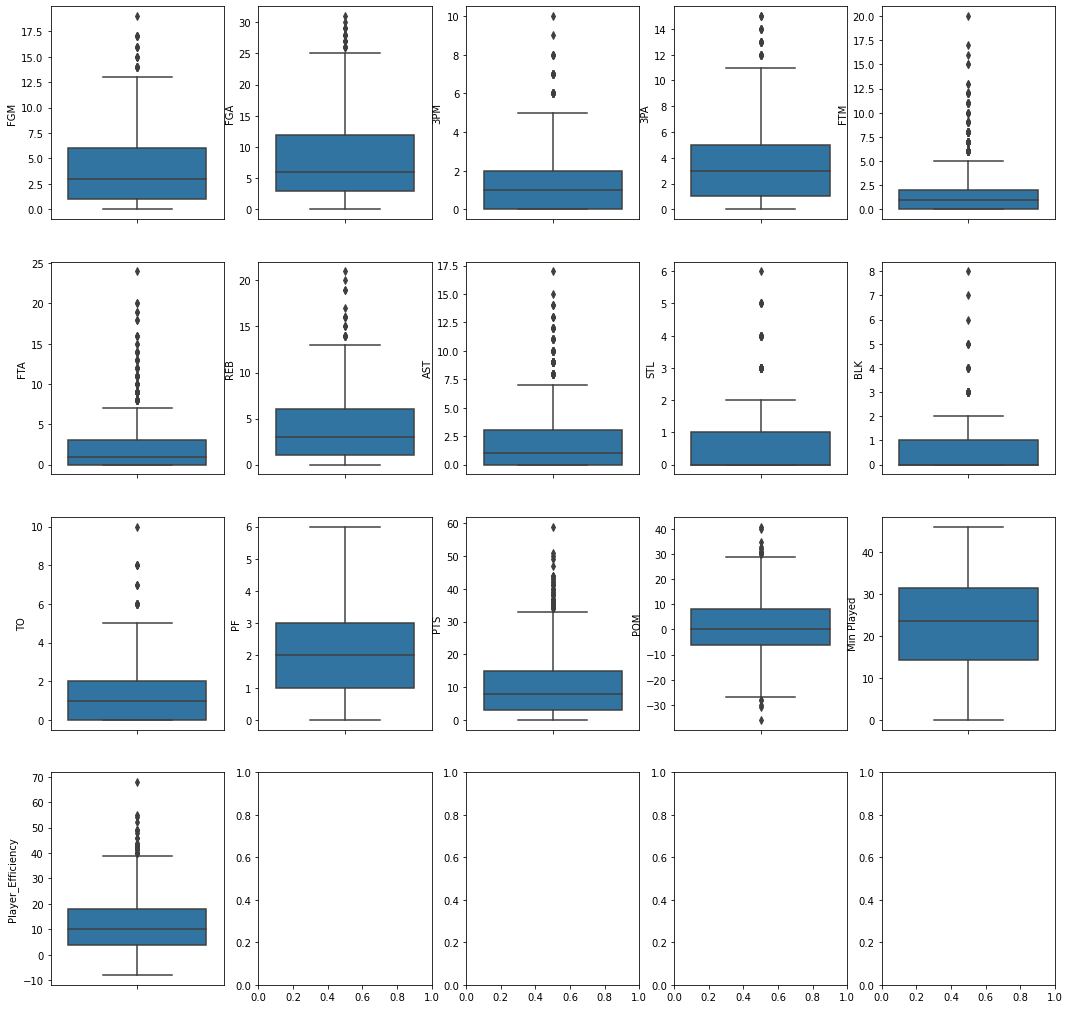

In [24]:
cols = list(num_df.iloc[:,2:])
fig, axes = plt.subplots(4,5, figsize=(18,18))
for i in range(len(cols)):
    sns.boxplot(ax=axes[i//5, i%5], y=num_df[cols[i]])

#### Inter Quartile Percentile Method to handle the Outliers

In [25]:
q1 = np.percentile(train_df['FGM'],25, interpolation = 'midpoint')
q3 = np.percentile(train_df['FGM'],75, interpolation = 'midpoint')

IQR = q3-q1

In [26]:
IQR

5.0

In [27]:
upper = (q3+1.5*IQR)
upper

13.5

In [28]:
lower = (q1-1.5*IQR)
lower

-6.5

In [29]:
upper_fgm = num_df['FGM'] >= (q3+1.5*IQR)

print("upper bound:",np.where(upper_fgm))
 
# Below Lower bound
lower_fgm= num_df['FGM'] <= (q1-1.5*IQR)
print("lower bound:",np.where(lower_fgm))


upper bound: (array([  27,   36,   56,  162,  267,  574,  584,  614,  631,  645,  736,
        798,  833,  908,  918,  972, 1032, 1051, 1131, 1243, 1265, 1352,
       1479]),)
lower bound: (array([], dtype=int64),)


In [30]:
q1 = np.percentile(train_df['FGA'],25, interpolation = 'midpoint')
q3 = np.percentile(train_df['FGA'],75, interpolation = 'midpoint')

IQR = q3-q1

upper = (q3+1.5*IQR)
lower = (q1-1.5*IQR)

print("upper :",upper)
print("lower :",lower)

upper_fga = num_df['FGA'] >= (q3+1.5*IQR)
print("upper bound:",np.where(upper_fga))

lower_fga = num_df['FGA'] <= (q1-1.5*IQR)
print("lower bound:",np.where(lower_fga))


upper : 25.5
lower : -10.5
upper bound: (array([  27,   36,   56,   96,  138,  207,  267,  614,  736,  879,  918,
        953,  992, 1032, 1051, 1243, 1331, 1381, 1479]),)
lower bound: (array([], dtype=int64),)


In [31]:
q1 = np.percentile(train_df['3PM'],25, interpolation = 'midpoint')
q3 = np.percentile(train_df['3PM'],75, interpolation = 'midpoint')

IQR = q3-q1

upper = (q3+1.5*IQR)
lower = (q1-1.5*IQR)

print("upper :",upper)
print("lower :",lower)

upper_3pm = num_df['3PM'] >= (q3+1.5*IQR)
print("upper bound:",np.where(upper_3pm))

lower_3pm = num_df['3PM'] <= (q1-1.5*IQR)
print("lower bound:",np.where(lower_3pm))


upper : 5.0
lower : -3.0
upper bound: (array([  86,  105,  107,  117,  124,  138,  146,  164,  196,  225,  226,
        231,  243,  250,  257,  267,  290,  311,  321,  324,  366,  401,
        430,  438,  458,  476,  487,  509,  510,  530,  553,  554,  574,
        584,  592,  601,  606,  614,  665,  678,  711,  714,  732,  736,
        746,  766,  769,  779,  810,  833,  868,  891,  943,  953,  971,
        972,  977,  981,  984,  993, 1023, 1032, 1051, 1061, 1095, 1129,
       1141, 1190, 1202, 1215, 1219, 1223, 1243, 1265, 1275, 1308, 1314,
       1342, 1351, 1410, 1495, 1533]),)
lower bound: (array([], dtype=int64),)


In [32]:
q1 = np.percentile(train_df['3PA'],25, interpolation = 'midpoint')
q3 = np.percentile(train_df['3PA'],75, interpolation = 'midpoint')

IQR = q3-q1

upper = (q3+1.5*IQR)
lower = (q1-1.5*IQR)

print("upper :",upper)
print("lower :",lower)

upper_3pa = num_df['3PA'] >= (q3+1.5*IQR)
print("upper bound:",np.where(upper_3pa))

lower_3pa = num_df['3PA'] <= (q1-1.5*IQR)
print("lower bound:",np.where(lower_3pa))


upper : 11.0
lower : -5.0
upper bound: (array([  27,   65,   96,  105,  107,  124,  138,  225,  226,  234,  243,
        250,  267,  366,  464,  476,  487,  509,  510,  520,  522,  530,
        531,  543,  553,  554,  574,  584,  592,  614,  622,  656,  678,
        701,  833,  878,  879,  953,  981,  984,  993, 1023, 1032, 1051,
       1129, 1141, 1229, 1265, 1342, 1533]),)
lower bound: (array([], dtype=int64),)


In [33]:
q1 = np.percentile(train_df['FTM'],25, interpolation = 'midpoint')
q3 = np.percentile(train_df['FTM'],75, interpolation = 'midpoint')

IQR = q3-q1

upper = (q3+1.5*IQR)
lower= (q1-1.5*IQR)

print("upper :",upper)
print("lower :",lower)

upper_ftm = num_df['FTM'] >= (q3+1.5*IQR)
print("upper bound:",np.where(upper_ftm))

lower_ftm = num_df['FTM'] <= (q1-1.5*IQR)
print("lower bound:",np.where(lower_ftm))


upper : 5.0
lower : -3.0
upper bound: (array([   4,   14,   15,   36,   46,   56,   58,   66,   76,   83,   86,
         95,  118,  127,  137,  144,  146,  153,  162,  173,  185,  186,
        195,  201,  207,  208,  211,  217,  222,  234,  243,  246,  255,
        267,  269,  275,  279,  313,  318,  323,  347,  362,  376,  417,
        421,  424,  431,  451,  464,  472,  476,  488,  506,  520,  530,
        531,  544,  554,  563,  564,  574,  593,  601,  614,  631,  645,
        654,  664,  667,  675,  678,  686,  698,  720,  735,  737,  753,
        754,  777,  779,  798,  799,  808,  811,  822,  824,  833,  845,
        847,  854,  868,  869,  877,  879,  887,  896,  906,  908,  918,
        927,  941,  950,  953,  971,  972,  981,  993, 1012, 1013, 1014,
       1026, 1031, 1042, 1047, 1048, 1051, 1060, 1072, 1084, 1107, 1119,
       1137, 1154, 1167, 1178, 1187, 1219, 1222, 1223, 1233, 1239, 1243,
       1253, 1266, 1270, 1276, 1286, 1297, 1308, 1309, 1321, 1330, 1342,
       1361,

In [34]:
q1 = np.percentile(train_df['FTA'],25, interpolation = 'midpoint')
q3 = np.percentile(train_df['FTA'],75, interpolation = 'midpoint')

IQR = q3-q1

upper = (q3+1.5*IQR)
lower = (q1-1.5*IQR)

print("upper :",upper)
print("lower :",lower)

upper_fta = num_df['FTA'] >= (q3+1.5*IQR)
print("upper bound:",np.where(upper_fta))

lower_fta = num_df['FTA'] <= (q1-1.5*IQR)
print("lower bound:",np.where(lower_fta))


upper : 7.5
lower : -4.5
upper bound: (array([   4,    6,   14,   15,   36,   46,   56,   58,   66,   76,   86,
         95,  104,  118,  127,  144,  146,  162,  185,  186,  201,  208,
        217,  222,  234,  255,  267,  275,  313,  322,  323,  362,  417,
        464,  476,  488,  520,  531,  614,  631,  645,  654,  664,  675,
        686,  698,  720,  753,  764,  777,  779,  798,  799,  808,  845,
        847,  868,  877,  887,  896,  908,  918,  941,  953,  971,  981,
       1013, 1051, 1084, 1107, 1178, 1222, 1233, 1243, 1253, 1266, 1286,
       1293, 1297, 1308, 1342, 1361, 1381, 1397, 1408, 1417, 1428, 1448,
       1460, 1469, 1473, 1489, 1521]),)
lower bound: (array([], dtype=int64),)


In [35]:
q1 = np.percentile(train_df['REB'],25, interpolation = 'midpoint')
q3 = np.percentile(train_df['REB'],75, interpolation = 'midpoint')

IQR = q3-q1

upper = (q3+1.5*IQR)
lower = (q1-1.5*IQR)

print("upper :",upper)
print("lower :",lower)

upper_reb = num_df['REB'] >= (q3+1.5*IQR)
print("upper bound:",np.where(upper_reb))

lower_reb = num_df['REB'] <= (q1-1.5*IQR)
print("lower bound:",np.where(lower_reb))


upper : 13.5
lower : -6.5
upper bound: (array([  46,  144,  323,  376,  417,  645,  654,  664,  698,  709,  777,
        951,  961,  991, 1022, 1106, 1231, 1316, 1350, 1479, 1510]),)
lower bound: (array([], dtype=int64),)


In [36]:
q1 = np.percentile(train_df['AST'],25, interpolation = 'midpoint')
q3 = np.percentile(train_df['AST'],75, interpolation = 'midpoint')

IQR = q3-q1

upper = (q3+1.5*IQR)
lower = (q1-1.5*IQR)

print("upper :",upper)
print("lower :",lower)

upper_ast = num_df['AST'] >= (q3+1.5*IQR)
print("upper bound:",np.where(upper_ast))

lower_ast= num_df['AST'] <= (q1-1.5*IQR)
print("lower bound:",np.where(lower_ast))


upper : 7.5
lower : -4.5
upper bound: (array([  13,   36,   46,   66,  118,  136,  165,  228,  238,  247,  258,
        270,  279,  286,  289,  313,  323,  333,  347,  387,  390,  397,
        399,  409,  429,  440,  473,  499,  510,  544,  554,  564,  574,
        581,  590,  611,  615,  621,  624,  634,  654,  667,  678,  698,
        712,  736,  764,  768,  789,  800,  810,  824,  847,  854,  869,
        878,  910,  918,  927,  937,  941,  963,  980,  981,  993, 1004,
       1024, 1033, 1042, 1043, 1061, 1072, 1073, 1085, 1096, 1108, 1119,
       1132, 1144, 1155, 1190, 1191, 1219, 1222, 1233, 1243, 1287, 1318,
       1342, 1362, 1473]),)
lower bound: (array([], dtype=int64),)


In [37]:
q1 = np.percentile(train_df['STL'],25, interpolation = 'midpoint')
q3 = np.percentile(train_df['STL'],75, interpolation = 'midpoint')

IQR = q3-q1

upper = (q3+1.5*IQR)
lower = (q1-1.5*IQR)

print("upper :",upper)
print("lower :",lower)

upper_stl = num_df['STL'] >= (q3+1.5*IQR)
print("upper bound:",np.where(upper_stl))

lower_stl = num_df['STL'] <= (q1-1.5*IQR)
print("lower bound:",np.where(lower_stl))


upper : 2.5
lower : -1.5
upper bound: (array([  36,   50,   55,   65,   72,   76,   94,   96,  124,  127,  128,
        139,  142,  270,  275,  280,  298,  316,  319,  347,  398,  408,
        410,  421,  440,  464,  472,  477,  483,  496,  541,  561,  601,
        611,  667,  686,  688,  737,  748,  775,  826,  830,  855,  881,
        894,  919,  920,  953,  971,  993, 1085, 1107, 1134, 1141, 1144,
       1187, 1212, 1242, 1283, 1296, 1328, 1372, 1381, 1396, 1400, 1473,
       1482]),)
lower bound: (array([], dtype=int64),)


In [38]:
q1 = np.percentile(train_df['BLK'],25, interpolation = 'midpoint')
q3 = np.percentile(train_df['BLK'],75, interpolation = 'midpoint')

IQR = q3-q1

upper = (q3+1.5*IQR)
lower = (q1-1.5*IQR)

print("upper :",upper)
print("lower :",lower)

upper_blk = num_df['BLK'] >= (q3+1.5*IQR)
print("upper bound:",np.where(upper_blk))

lower_blk = num_df['BLK'] <= (q1-1.5*IQR)
print("lower bound:",np.where(lower_blk))


upper : 2.5
lower : -1.5
upper bound: (array([ 155,  208,  275,  291,  409,  502,  517,  621,  632,  634,  645,
        646,  655,  722,  734,  766,  808,  918, 1000, 1058, 1115, 1130,
       1142, 1164, 1173, 1222, 1240, 1251, 1321, 1368, 1378, 1382, 1397,
       1415, 1425, 1445, 1449, 1459, 1530]),)
lower bound: (array([], dtype=int64),)


In [39]:
q1 = np.percentile(train_df['TO'],25, interpolation = 'midpoint')
q3 = np.percentile(train_df['TO'],75, interpolation = 'midpoint')

IQR = q3-q1

upper = (q3+1.5*IQR)
lower = (q1-1.5*IQR)

print("upper :",upper)
print("lower :",lower)

upper_to = num_df['TO'] >= (q3+1.5*IQR)
print("upper bound:",np.where(upper_to))

lower_to = num_df['TO'] <= (q1-1.5*IQR)
print("lower bound:",np.where(lower_to))


upper : 5.0
lower : -3.0
upper bound: (array([  36,   66,   86,  104,  144,  156,  185,  208,  237,  278,  313,
        325,  387,  412,  417,  443,  496,  507,  544,  545,  554,  564,
        571,  645,  648,  720,  723,  736,  744,  753,  777,  834,  845,
        896,  918,  931,  953,  962,  972, 1014, 1024, 1029, 1118, 1154,
       1178, 1233, 1286, 1299, 1309, 1318, 1350, 1387, 1427, 1459, 1469,
       1483, 1489, 1501, 1520, 1523]),)
lower bound: (array([], dtype=int64),)


In [40]:
q1 = np.percentile(train_df['PTS'],25, interpolation = 'midpoint')
q3 = np.percentile(train_df['PTS'],75, interpolation = 'midpoint')

IQR = q3-q1

upper = (q3+1.5*IQR)
lower = (q1-1.5*IQR)

print("upper :",upper)
print("lower :",lower)

upper_pts = num_df['PTS'] >= (q3+1.5*IQR)
print("upper bound:",np.where(upper_pts))

lower_pts = num_df['PTS'] <= (q1-1.5*IQR)
print("lower bound:",np.where(lower_pts))


upper : 33.0
lower : -15.0
upper bound: (array([   4,   27,   36,   56,   66,   76,   86,  105,  118,  127,  146,
        162,  217,  234,  255,  267,  464,  476,  487,  510,  554,  574,
        584,  601,  614,  631,  645,  664,  667,  736,  779,  798,  833,
        887,  908,  918,  953,  971,  972,  981, 1013, 1032, 1051, 1084,
       1095, 1107, 1233, 1243, 1265, 1266, 1297, 1381, 1479]),)
lower bound: (array([], dtype=int64),)


In [41]:
q1 = np.percentile(train_df['Player_Efficiency'],25, interpolation = 'midpoint')
q3 = np.percentile(train_df['Player_Efficiency'],75, interpolation = 'midpoint')

IQR = q3-q1

upper = (q3+1.5*IQR)
lower = (q1-1.5*IQR)

print("upper :",upper)
print("lower :",lower)

upper_pe = num_df['Player_Efficiency'] >= (q3+1.5*IQR)
print("upper bound:",np.where(upper_pe))

lower_pe = num_df['Player_Efficiency'] <= (q1-1.5*IQR)
print("lower bound:",np.where(lower_pe))


upper : 39.0
lower : -17.0
upper bound: (array([  27,   36,   76,  118,  127,  146,  162,  267,  323,  347,  574,
        614,  631,  645,  667,  686,  779,  798,  810,  833,  908,  918,
        971,  981, 1051, 1187, 1243, 1265, 1266, 1460, 1479]),)
lower bound: (array([], dtype=int64),)


In [42]:
outliers = np.where([upper_fga,
                     upper_fgm,
                     upper_3pm,
                     upper_3pa,
                     upper_ftm,
                     upper_fta,
                     upper_reb,
                     upper_ast,
                     upper_stl,
                     upper_blk,
                     upper_to,
                     upper_pts,
                     upper_pe] )

In [43]:
outliers

(array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,
         2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
         2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
         2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
         2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
         2,  2,  2,  2,  2,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
         3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
         3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
         3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
         4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
         4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
         4, 

In [44]:
unique_outliers = np.unique(outliers)

In [45]:
len(unique_outliers)

403

In [46]:
num_df.drop(unique_outliers, axis=0,inplace=True)

In [47]:
num_df.reset_index(drop=True, inplace=True)

In [48]:
num_df

,TEAM,PLAYER,FGM,FGA,3PM,3PA,FTM,FTA,REB,AST,STL,BLK,TO,PF,PTS,POM,Min Played,Player_Efficiency
0,Dallas Mavericks,Maxi Kleber,3,5,2,3,1,2,8,0,2,0,1,1,9,14,21.25,15
1,Dallas Mavericks,Josh Green,1,1,1,1,2,2,0,1,0,0,1,5,5,10,15.27,5
2,Dallas Mavericks,Dwight Powell,0,0,0,0,1,2,0,0,0,1,1,2,1,8,7.06,0
3,Dallas Mavericks,Theo Pinson,0,0,0,0,2,2,2,1,0,0,0,0,2,8,7.00,5
4,Dallas Mavericks,Jaden Hardy,0,3,0,2,0,0,1,0,0,0,2,0,0,3,6.16,-4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1131,Orlando Magic,Franz Wagner,7,17,1,1,3,4,6,4,0,1,2,3,18,-25,34.53,16
1132,Orlando Magic,Terrence Ross,1,4,1,2,3,3,2,2,0,0,3,3,6,-2,26.37,4
1133,Orlando Magic,Admiral Schofield,3,4,0,1,0,0,1,3,1,0,1,5,6,-9,11.30,9
1134,Orlando Magic,Caleb Houstan,1,3,1,3,0,0,4,0,0,0,0,0,3,3,22.19,5


In [49]:
num_df.isna().sum()

TEAM                 0
PLAYER               0
FGM                  0
FGA                  0
3PM                  0
3PA                  0
FTM                  0
FTA                  0
REB                  0
AST                  0
STL                  0
BLK                  0
TO                   0
PF                   0
PTS                  0
POM                  0
Min Played           0
Player_Efficiency    0
dtype: int64

In [50]:
num_df.describe()

,FGM,FGA,3PM,3PA,FTM,FTA,REB,AST,STL,BLK,TO,PF,PTS,POM,Min Played,Player_Efficiency
count,1136.000000,1136.000000,1136.000000,1136.000000,1136.000000,1136.000000,1136.000000,1136.000000,1136.000000,1136.000000,1136.000000,1136.000000,1136.000000,1136.000000,1136.000000,1136.000000
mean,2.701585,5.926056,0.842430,2.453345,0.868838,1.179577,3.419894,1.449824,0.452465,0.342430,0.950704,1.795775,7.114437,0.082746,19.174190,8.293134
std,2.444780,4.592446,1.063116,2.289514,1.235116,1.562604,2.940034,1.615219,0.655329,0.594983,1.080561,1.467000,6.124489,10.045633,10.356477,7.268870
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-36.000000,0.010000,-8.000000
25%,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,-6.000000,11.300000,2.000000
50%,2.000000,5.000000,0.000000,2.000000,0.000000,0.000000,3.000000,1.000000,0.000000,0.000000,1.000000,2.000000,6.000000,0.000000,19.275000,7.000000
75%,4.000000,8.000000,1.000000,4.000000,2.000000,2.000000,5.000000,2.000000,1.000000,1.000000,2.000000,3.000000,11.000000,6.000000,27.392500,13.000000
max,12.000000,23.000000,4.000000,10.000000,4.000000,7.000000,13.000000,7.000000,2.000000,2.000000,4.000000,6.000000,31.000000,41.000000,46.090000,32.000000


#### After Handling the Outliers

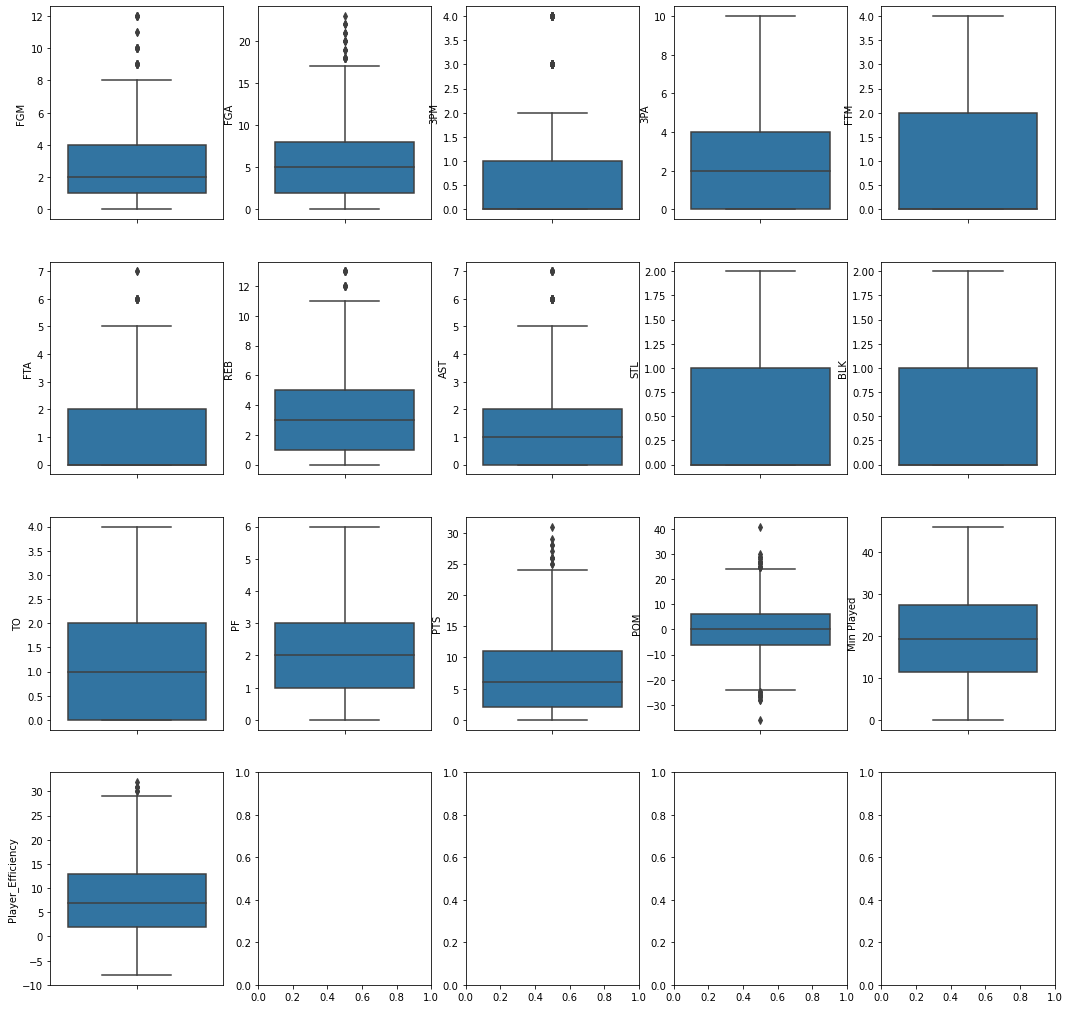

In [51]:
cols = list(num_df.iloc[:,2:])
fig, axes = plt.subplots(4,5, figsize=(18,18))
for i in range(len(cols)):
    sns.boxplot(ax=axes[i//5, i%5], y=num_df[cols[i]])

#### Skewness of the Data

FGM
1.1009011129195019


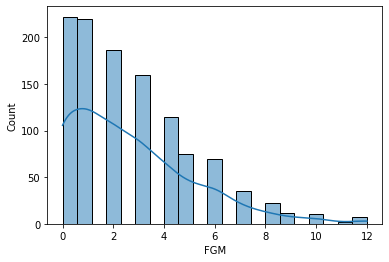

FGA
0.9755924933145679


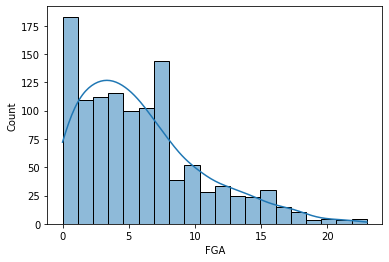

3PM
1.1574844420931512


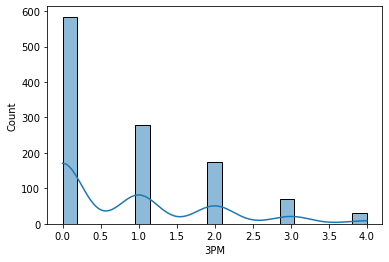

3PA
0.8172719208158125


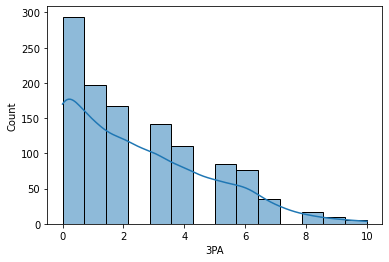

FTM
1.24385082296485


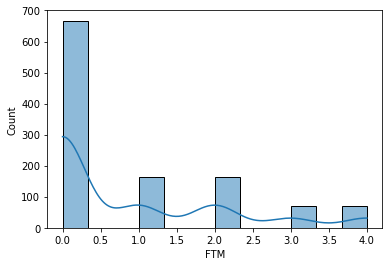

FTA
1.1893790686383052


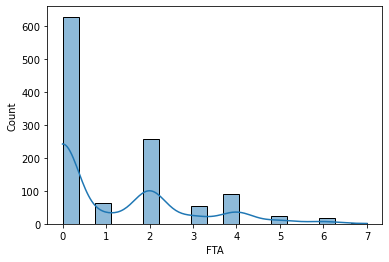

REB
0.9235337795918542


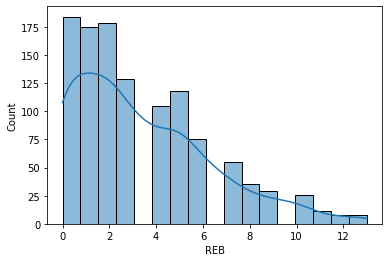

AST
1.3038921697606494


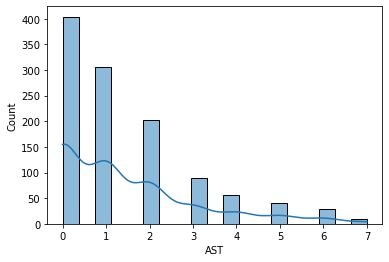

STL
1.1435822314049797


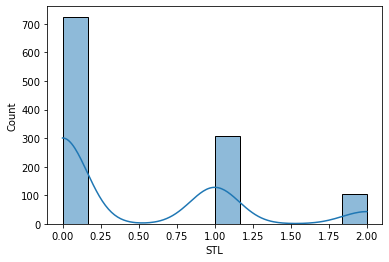

BLK
1.5426592162344823


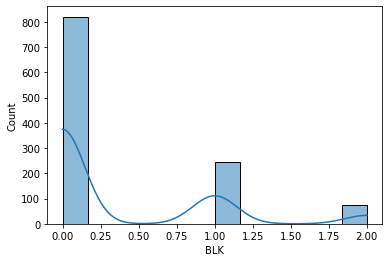

TO
1.0620039690932839


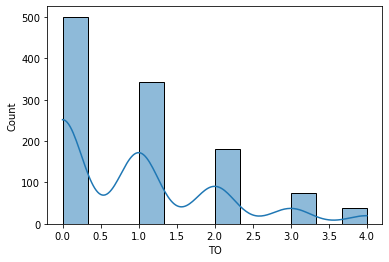

PF
0.6187517760280126


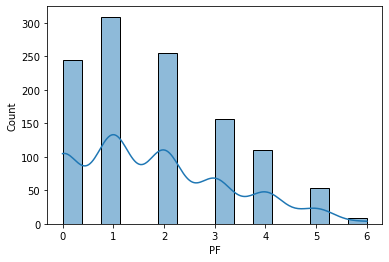

PTS
0.9259189229255863


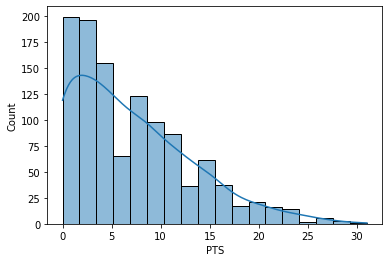

POM
0.21914610792398775


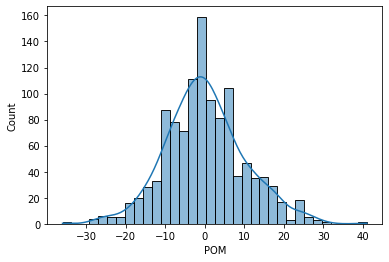

Min Played
0.007516703860525662


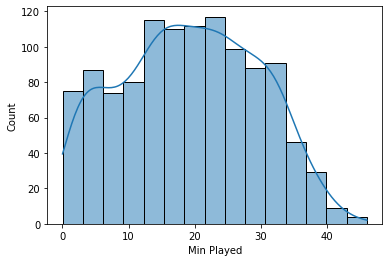

Player_Efficiency
0.6721627241880466


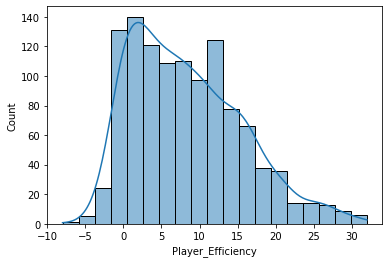

In [52]:
from scipy.stats import skew

cols = ['FGM','FGA','3PM','3PA','FTM','FTA','REB','AST','STL','BLK','TO','PF','PTS','POM','Min Played','Player_Efficiency']

for col in num_df[cols]:
    print(col)
    print(skew(num_df[col]))
    
    plt.figure()
    sns.histplot(num_df[col], kde=True)
    plt.show()

In [53]:
num_df.skew().sort_values(ascending=True)

Min Played           0.007527
POM                  0.219436
PF                   0.619570
Player_Efficiency    0.673052
3PA                  0.818353
REB                  0.924755
PTS                  0.927144
FGA                  0.976883
TO                   1.063409
FGM                  1.102357
STL                  1.145095
3PM                  1.159015
FTA                  1.190952
FTM                  1.245496
AST                  1.305617
BLK                  1.544700
dtype: float64

### Visualising the Data

FGM Vs Player Efficiency


<Figure size 432x288 with 0 Axes>

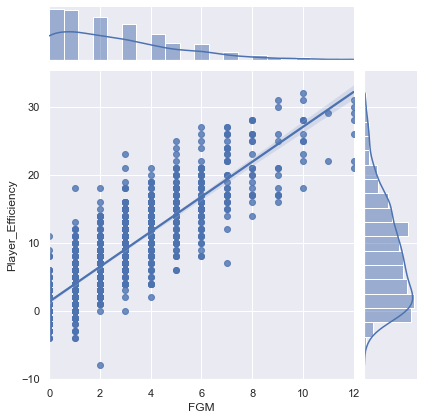

FGA Vs Player Efficiency


<Figure size 432x288 with 0 Axes>

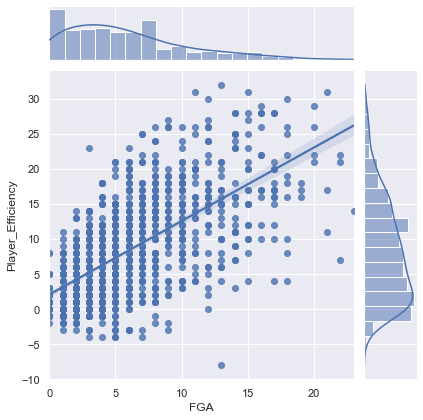

3PM Vs Player Efficiency


<Figure size 432x288 with 0 Axes>

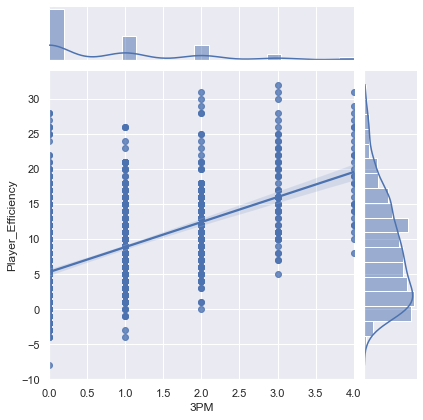

3PA Vs Player Efficiency


<Figure size 432x288 with 0 Axes>

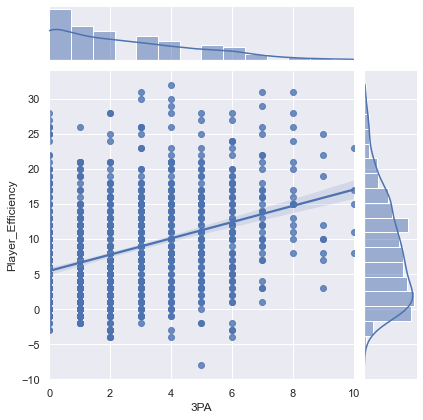

FTM Vs Player Efficiency


<Figure size 432x288 with 0 Axes>

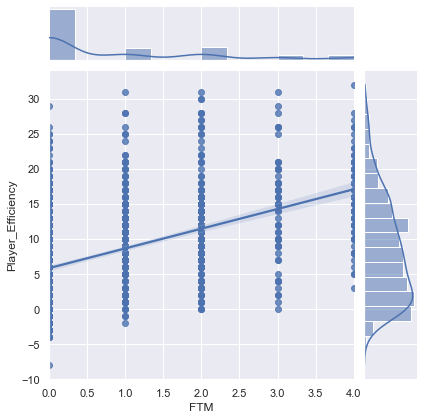

FTA Vs Player Efficiency


<Figure size 432x288 with 0 Axes>

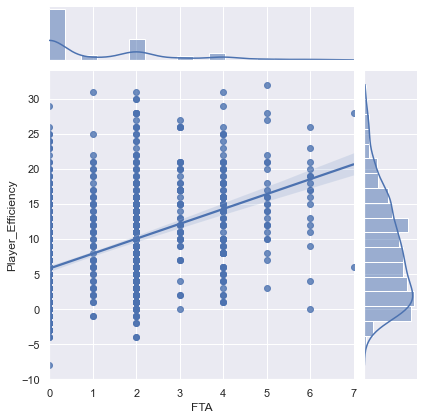

REB Vs Player Efficiency


<Figure size 432x288 with 0 Axes>

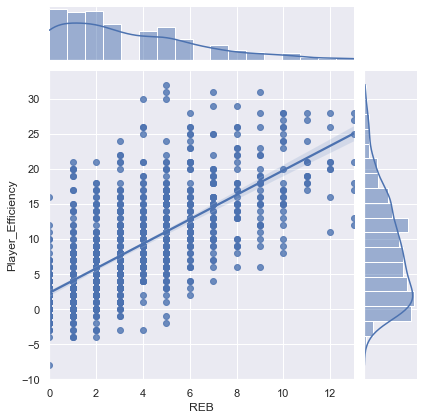

AST Vs Player Efficiency


<Figure size 432x288 with 0 Axes>

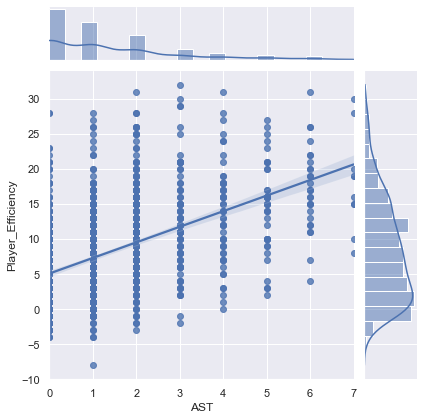

STL Vs Player Efficiency


<Figure size 432x288 with 0 Axes>

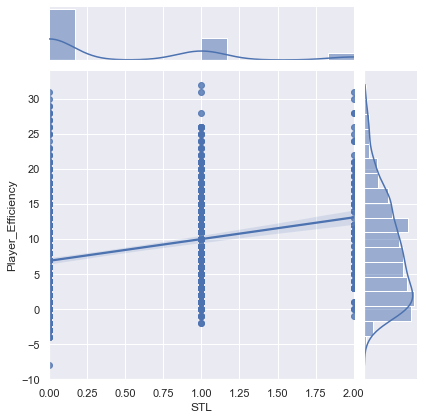

BLK Vs Player Efficiency


<Figure size 432x288 with 0 Axes>

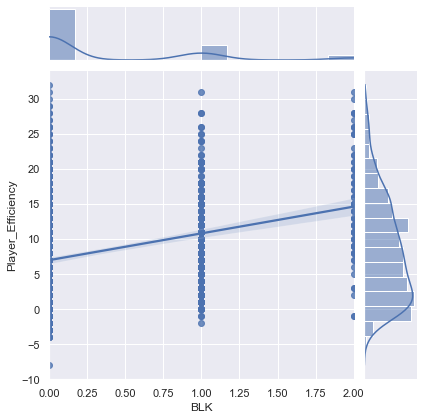

TO Vs Player Efficiency


<Figure size 432x288 with 0 Axes>

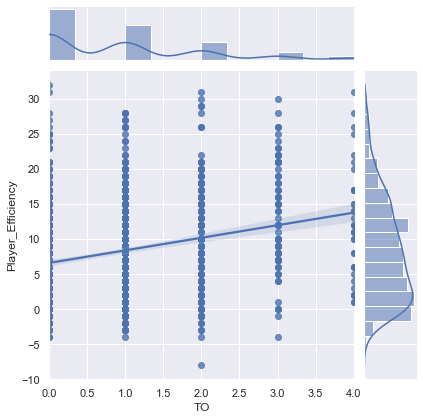

PF Vs Player Efficiency


<Figure size 432x288 with 0 Axes>

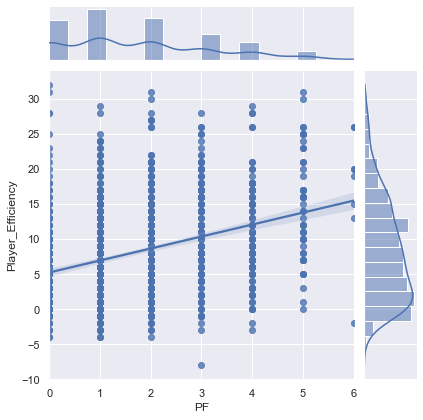

PTS Vs Player Efficiency


<Figure size 432x288 with 0 Axes>

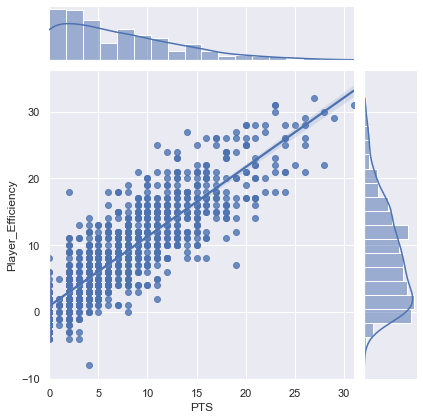

POM Vs Player Efficiency


<Figure size 432x288 with 0 Axes>

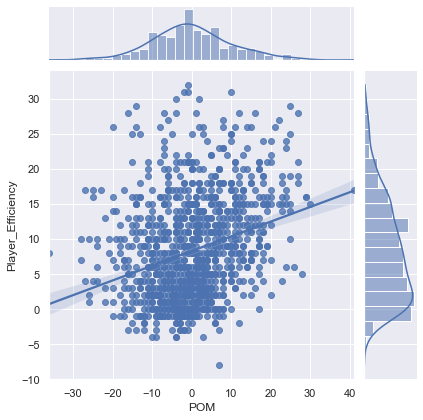

Min Played Vs Player Efficiency


<Figure size 432x288 with 0 Axes>

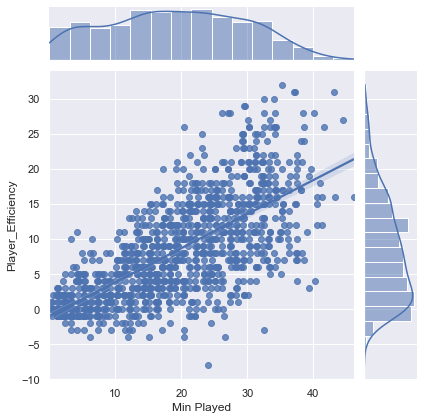

In [54]:
cols =['FGM','FGA','3PM','3PA','FTM','FTA','REB','AST','STL','BLK','TO','PF','PTS','POM','Min Played']

for col in num_df[cols]:
    print(col,"Vs Player Efficiency")
    
    sns.set_theme(style='darkgrid')
    plt.figure()
    sns.jointplot(x=num_df[col],y=num_df['Player_Efficiency'], kind='reg')   
    plt.show()

Values of Field Goals Made: [ 0  1  2  3  4  5  6  7  8  9 10 11 12]


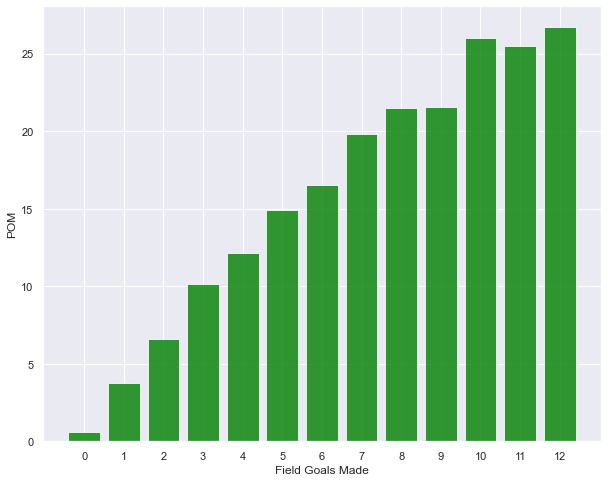

In [55]:
fgm = np.unique(num_df['FGM'])
print("Values of Field Goals Made:",fgm)
fgm_mean={}

for f in fgm:
    fgm_df = num_df.loc[num_df['FGM']==f]
    fgm_mean[f] = fgm_df['Player_Efficiency'].mean()
    
plt.figure(figsize=(10,8))    
plt.bar(fgm, [fgm_mean[f] for f in fgm],color='green', alpha=0.80)
plt.xticks(np.arange(0,13))
plt.xlabel("Field Goals Made")
plt.ylabel("POM")
plt.show()

values of Personal Fouls: [0 1 2 3 4 5 6]


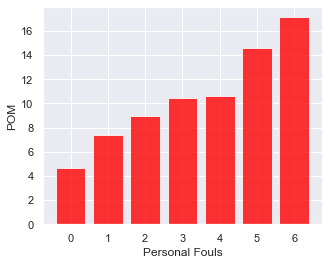

In [56]:
pf = np.unique(num_df['PF'])
print("values of Personal Fouls:",pf)

pf_mean={}

for p in pf:
    pf_df= num_df.loc[num_df['PF']==p]
    pf_mean[p]= pf_df['Player_Efficiency'].mean()
    
plt.figure(figsize=(5,4))    
plt.bar(pf, [pf_mean[f] for f in pf],color='red', alpha=0.80)
plt.xticks(np.arange(0,7))
plt.xlabel("Personal Fouls")
plt.ylabel("POM")
plt.show()

Unique values of PTS: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 31]


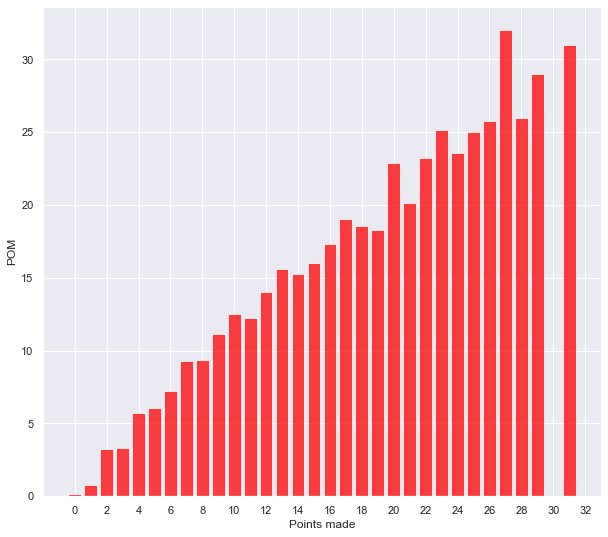

In [57]:
pts = np.unique(num_df['PTS'])
print("Unique values of PTS:",pts)

pts_mean={}

for t in pts:
    pts_df = num_df.loc[num_df['PTS']==t]
    pts_mean[t] = pts_df['Player_Efficiency'].mean()
    
plt.figure(figsize=(10,9))    
plt.bar(pts, [pts_mean[t] for t in pts],color='red', alpha=0.75)
plt.xticks(np.arange(0,34,2))
plt.xlabel("Points made")
plt.ylabel("POM")
plt.show()

unique values of BLK : [0 1 2]


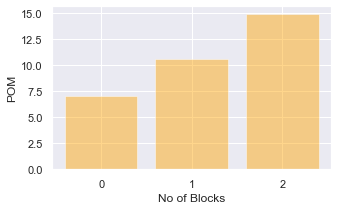

In [58]:
blk = np.unique(num_df['BLK'])
print("unique values of BLK :",blk)

blk_mean={}

for b in blk:
    blk_df= num_df.loc[num_df['BLK']==b]
    blk_mean[b] = blk_df['Player_Efficiency'].mean()
    
plt.figure(figsize=(5,3))
plt.bar(blk, [blk_mean[b] for b in blk], color='orange', alpha=0.45)
plt.xticks(np.arange(0,3))
plt.xlabel("No of Blocks")
plt.ylabel("POM")
plt.show()

unique values of STL [0 1 2]


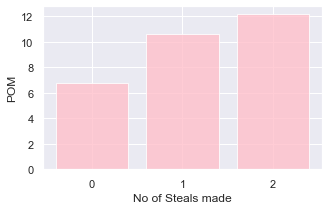

In [59]:
stl = np.unique(num_df['STL'])
print("unique values of STL",stl)

stl_mean={}

for s in stl:
    stl_df = num_df.loc[num_df['STL']==s]
    stl_mean[s]= stl_df['Player_Efficiency'].mean()
    
plt.figure(figsize=(5,3))
plt.bar(stl, [stl_mean[s] for s in stl], color='pink', alpha=0.80)
plt.xticks(np.arange(0,3))
plt.xlabel("No of Steals made")
plt.ylabel("POM")
plt.show()

Unique values of TO : [0 1 2 3 4]


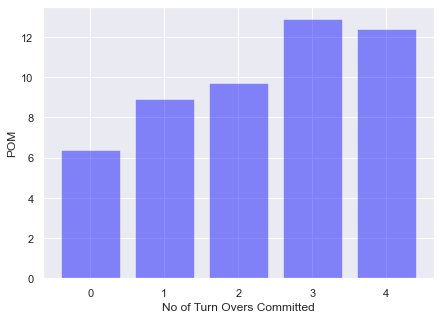

In [60]:
to = np.unique(num_df['TO'])
print("Unique values of TO :",to)

to_mean={}

for o in to:
    to_df = num_df.loc[num_df['TO']==o]
    to_mean[o]= to_df['Player_Efficiency'].mean()
    
plt.figure(figsize=(7,5))
plt.bar(to, [to_mean[o] for o in to], color='blue', alpha=0.45)
plt.xticks(np.arange(0,5))
plt.xlabel("No of Turn Overs Committed")
plt.ylabel("POM")
plt.show()

#### Correlation Matrix

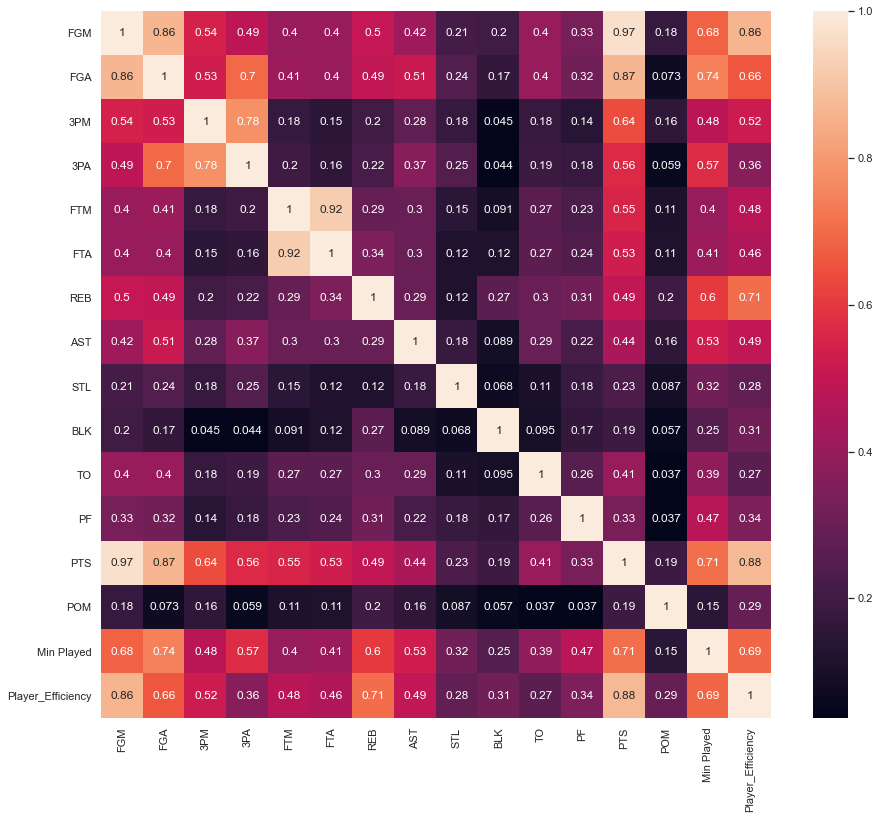

In [61]:
plt.figure(figsize=(15,13))

sns.heatmap(num_df.corr(), annot=True)
plt.show()

In [62]:
corr_matrix = num_df.corr()
corr_matrix

,FGM,FGA,3PM,3PA,FTM,FTA,REB,AST,STL,BLK,TO,PF,PTS,POM,Min Played,Player_Efficiency
FGM,1.000000,0.864689,0.541222,0.487909,0.402230,0.403112,0.501876,0.416000,0.212484,0.202356,0.401315,0.328145,0.973427,0.176146,0.683272,0.863387
FGA,0.864689,1.000000,0.531410,0.697849,0.412551,0.403941,0.493273,0.513680,0.243865,0.168885,0.402294,0.318682,0.865778,0.072723,0.744508,0.661432
3PM,0.541222,0.531410,1.000000,0.781199,0.175478,0.146457,0.201311,0.275281,0.179566,0.044983,0.177303,0.140353,0.641064,0.156567,0.477784,0.520868
3PA,0.487909,0.697849,0.781199,1.000000,0.196459,0.161188,0.218817,0.365077,0.246034,0.044401,0.192093,0.176587,0.564751,0.058702,0.572214,0.364661
FTM,0.402230,0.412551,0.175478,0.196459,1.000000,0.922033,0.289837,0.297673,0.146316,0.091145,0.267796,0.227360,0.553254,0.109805,0.400558,0.476714
FTA,0.403112,0.403941,0.146457,0.161188,0.922033,1.000000,0.342392,0.296101,0.118473,0.115751,0.267714,0.236629,0.533197,0.114002,0.411537,0.455966
REB,0.501876,0.493273,0.201311,0.218817,0.289837,0.342392,1.000000,0.293037,0.117603,0.267279,0.300495,0.313856,0.494074,0.196098,0.604936,0.706478
AST,0.416000,0.513680,0.275281,0.365077,0.297673,0.296101,0.293037,1.000000,0.183778,0.088945,0.294902,0.219512,0.439934,0.160874,0.533556,0.493718
STL,0.212484,0.243865,0.179566,0.246034,0.146316,0.118473,0.117603,0.183778,1.000000,0.067769,0.108667,0.182350,0.230316,0.086787,0.317608,0.278796
BLK,0.202356,0.168885,0.044983,0.044401,0.091145,0.115751,0.267279,0.088945,0.067769,1.000000,0.094800,0.168011,0.187743,0.056872,0.248871,0.311889


In [63]:
corr_matrix['Player_Efficiency'].sort_values(ascending=False)

Player_Efficiency    1.000000
PTS                  0.875848
FGM                  0.863387
REB                  0.706478
Min Played           0.691470
FGA                  0.661432
3PM                  0.520868
AST                  0.493718
FTM                  0.476714
FTA                  0.455966
3PA                  0.364661
PF                   0.344296
BLK                  0.311889
POM                  0.289491
STL                  0.278796
TO                   0.266121
Name: Player_Efficiency, dtype: float64

### Train and Split the data

### Model 1 (70-30)

In [64]:
from numpy.random import shuffle

n = len(num_df)
training_size = 0.70


indices = np.array(range(n))
shuffle(indices)
split_point = int(n*training_size)
mytrain_i = indices[0:split_point]
mytest_i = indices[split_point:]


new_train_df = num_df.iloc[mytrain_i]
new_test_df = num_df.iloc[mytest_i]

print("samples in the new training set",len(new_train_df))
print("samples in the new testing set",len(new_test_df))

samples in the new training set 795
samples in the new testing set 341


In [65]:
cols = ['FGM','PTS','REB','Min Played','3PM']

X_train = new_train_df[cols]
Y_train = new_train_df['Player_Efficiency']

Y_train = np.array(Y_train).reshape(-1,1)

X_test = new_test_df[cols]
Y_test= new_test_df['Player_Efficiency']

In [66]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

Y_train = scaler.fit_transform(Y_train)

X_test = scaler.fit_transform(X_test)

#### Linear Regression

In [67]:
from sklearn.linear_model import LinearRegression

In [68]:

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [69]:
lin_reg=LinearRegression()
lin_reg.fit(X_train, Y_train)

y_pred = lin_reg.predict(X_test)
y_pred = y_pred.reshape(-1, 1)


error = np.sqrt(mean_squared_error(Y_test,y_pred))
mae = mean_absolute_error(Y_test, y_pred)
rscore = r2_score(Y_test, y_pred)



print("RMS error :", error)
print("Mean Absolute Error :",mae)
print("R2score :",rscore)

RMS error : 10.1133820922
Mean Absolute Error : 7.78614265413
R2score : -0.827661181952


#### KNeighbor Regressor

In [70]:
from sklearn.neighbors import KNeighborsRegressor

In [71]:
kn = KNeighborsRegressor()
kn.fit(X_train, Y_train)

y_pred = kn.predict(X_test)
y_pred = y_pred.reshape(-1, 1)


error = np.sqrt(mean_squared_error(Y_test,y_pred))
mae = mean_absolute_error(Y_test, y_pred)
rscore = r2_score(Y_test, y_pred)


print("RMS error :", error)
print("Mean Absolute Error :",mae)
print("R2score :",rscore)

RMS error : 10.1846112041
Mean Absolute Error : 7.8464132124
R2score : -0.853496480871


#### Support Vector Machine

In [72]:
from sklearn.svm import SVR

In [73]:
svm=SVR()
svm.fit(X_train, np.ravel(Y_train))

y_pred = svm.predict(X_test)
y_pred = y_pred.reshape(-1, 1)


error = np.sqrt(mean_squared_error(Y_test,y_pred))
mae = mean_absolute_error(Y_test, y_pred)
rscore = r2_score(Y_test, y_pred)



print("RMS error :", error)
print("Mean Absolute Error :",mae)
print("R2score :",rscore)

RMS error : 10.146066395
Mean Absolute Error : 7.80309831051
R2score : -0.839493496336


#### Random Forest Regressor

In [74]:
from sklearn.ensemble import RandomForestRegressor

In [75]:
rf = RandomForestRegressor()
rf.fit(X_train, np.ravel(Y_train))

y_pred = rf.predict(X_test)
y_pred = y_pred.reshape(-1, 1)


error = np.sqrt(mean_squared_error(Y_test,y_pred))
mae = mean_absolute_error(Y_test, y_pred)
rscore = r2_score(Y_test, y_pred)



print("RMS error :", error)
print("Mean Absolute Error :",mae)
print("R2score :",rscore)

RMS error : 10.1197085237
Mean Absolute Error : 7.78985471359
R2score : -0.829948485981


### Model 2 (80-20)

In [76]:
from numpy.random import shuffle

n = len(num_df)
training_size = 0.80


indices = np.array(range(n))
shuffle(indices)
split_point = int(n*training_size)
mytrain_i = indices[0:split_point]
mytest_i = indices[split_point:]


new_train_df = num_df.iloc[mytrain_i]
new_test_df = num_df.iloc[mytest_i]

print("samples in the new training set",len(new_train_df))
print("samples in the new testing set",len(new_test_df))

samples in the new training set 908
samples in the new testing set 228


In [77]:
cols = ['FGM','PTS','REB','Min Played','3PM']

X_train = new_train_df[cols]
Y_train = new_train_df['Player_Efficiency']

Y_train = np.array(Y_train).reshape(-1,1)

X_test = new_test_df[cols]
Y_test= new_test_df['Player_Efficiency']

#### Linear Regression

In [78]:
lin_reg=LinearRegression()
lin_reg.fit(X_train, Y_train)

y_pred = lin_reg.predict(X_test)
y_pred = y_pred.reshape(-1, 1)


error = np.sqrt(mean_squared_error(Y_test,y_pred))
mae = mean_absolute_error(Y_test, y_pred)
rscore = r2_score(Y_test, y_pred)
ex_var_score = explained_variance_score(Y_test, y_pred)


print("RMS error :", error)
print("Mean Absolute Error :",mae)
print("R2score :",rscore)

NameError: name 'explained_variance_score' is not defined

#### KNeighbor Regressor

In [ ]:
kn = KNeighborsRegressor()
kn.fit(X_train, Y_train)

y_pred = kn.predict(X_test)
y_pred = y_pred.reshape(-1, 1)


error = np.sqrt(mean_squared_error(Y_test,y_pred))
mae = mean_absolute_error(Y_test, y_pred)
rscore = r2_score(Y_test, y_pred)


print("RMS error :", error)
print("Mean Absolute Error :",mae)
print("R2score :",rscore)

#### Support Vector Machine

In [ ]:
svm=SVR()
svm.fit(X_train, np.ravel(Y_train))

y_pred = svm.predict(X_test)
y_pred = y_pred.reshape(-1, 1)


error = np.sqrt(mean_squared_error(Y_test,y_pred))
mae = mean_absolute_error(Y_test, y_pred)
rscore = r2_score(Y_test, y_pred)



print("RMS error :", error)
print("Mean Absolute Error :",mae)
print("R2score :",rscore)

#### Random Forest Regressor

In [ ]:
rf = RandomForestRegressor()
rf.fit(X_train, np.ravel(Y_train))

y_pred = rf.predict(X_test)
y_pred = y_pred.reshape(-1, 1)


error = np.sqrt(mean_squared_error(Y_test,y_pred))
mae = mean_absolute_error(Y_test, y_pred)
rscore = r2_score(Y_test, y_pred)



print("RMS error :", error)
print("Mean Absolute Error :",mae)
print("R2score :",rscore)